In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Conceptual Exercises

**1. Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.**

|           	    | Coefficient 	| Std. error 	| t-statistic 	| p-value  	|
|---------------	|-------------	|------------	|-------------	|----------	|
| **Intercept** 	| 2.939      	| 0.3119      	| 9.42       	| < 0.0001 	|
| **TV**        	| 0.046      	| 0.0014      	| 32.81       	| < 0.0001 	|
| **radio**     	| 0.189      	| 0.0086      	| 21.89        	| < 0.0001 	|
| **newspaper**  	| -0.001      	| 0.0059      	| -0.18       	| 0.8599 	|

> **Table 3.4.** *For the Advertising data, least squares coefficient estimates of the multiple linear regression of number of units sold on radio, TV, and newspaper advertising budgets.*

The first null hypothesis, related to the **intercept** term stats that we can conclude that **sales** will not be zero if we spend no money on TV, radio, or newspaper advertisting. The rest of the null hypotheses test whether TV, radio, or newspaper have any effect on sales. From the **intercept** p-value, we can conclude that if we spend no money on advertising, we would expect some sales. The second and third p-values state that if we spend money or TV and radio, we can expect some sort of return on investment in terms of sales. From the newspaper p-value, we cannot reject the null hypothesis that radio has no effect on sales.

---

**2. Carefully explain the differences between the KNN classifier and KNN regression methods.**

The KNN classifier attempts to fit the $Y$ into some set of categories. For example, if we have the MPG, weight, and horsepower of a car, we might try to determine if it is a SUV, sedan, sports car, etc. KNN regression attempts to try and guess some quantitative values from the neighbors of a given point. For example, if we had the height and gender of someone, we can guess their weight by trying to find the K-nearest neighbors in a $\text{height} \times \text{gender}$ and average the $k$ weight values to come up with a best guess for the weight of the someone.

---

**3. Suppose we have a data set with five predictors, $X_1 = \text{GPA}$, $X_2 = \text{IQ}$, $X_3 = \text{ Gender (1 for Female and 0 for Male)}$, $X_4 = \text{ Interaction between GPA and IQ}$, and $X_5 = \text{ Interaction between GPA and Gender}$. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta}_0 = 50$, $\hat{\beta}_1 = 20$, $\hat{\beta}_2 = 0.07$, $\hat{\beta}_3 = 35$, $\hat{\beta}_4 = 0.01$, $\hat{\beta}_5 = −10.$**
- **(a) Which answer is correct, and why?**
    - **i. For a fixed value of IQ and GPA, males earn more on average than females.**
    - **ii. For a fixed value of IQ and GPA, females earn more on average than males.**
    - **iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.**
    - **iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.**

The coefficient for the gender term is 35, which adds 35 units to the model if the gender is female and adds 0 to the model if the gender is male. This suggests that females earn more on average than males, no other terms considered.

However, the GPA/gender interaction actually punishes females (and not males) for having higher GPAs.

Therefore, **option iii.** is correct. Our model would expect males to earn more than females, provided that the GPA range in consideration is high enough.

**(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.**

In [2]:
def salary (gpa=4.0, iq=110, gender=1):
    return 50 + (20*gpa) + (0.07*iq) + (35*gender) + (0.01*gpa*iq) + (-10*gpa*gender)

salary()

137.1

This model predicts that a female of IQ 110 and a GPA of 4.0 will have a salary of \$137,100

**(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.**

False. The size of the coefficient does not translate to evidence of an interaction. For that, we must still use the various statistics (p-value, F statistic, etc.) that help us determine whether or not there is evidence of an interaction or allow us to accept the "alternative hypothesis."

In other words, a term can have a small coefficient, but if it has an even smaller p-value, then an interaction could very well still be statistically significant.

---

**4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e.**
$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$

- **(a) Suppose that the true relationship between X and Y is linear, i.e. $Y = \beta_0 + \beta_1 X + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

A polynomial fit with a cubic term is a more flexible approach than a strictly linear model. We know from chapter 2 that as flexibility increases, training error decreases. There is no reason to believe this suddenly would not apply here.

Note that if we set $\beta_2 = 0$ and $\beta_3 = 0$, then we get the linear regression model. Thus, if the linear regression model had a lower RSS, then we wouldn’t have gotten the least squares fit of cubic model. This is a contradiction, so we have that the cubic model must have a lower RSS.

I would expect is that the polynomial fit will oscillate more between points in an attempt to fit more of the training data points and lower the squared error. However, after running dozens of simulations of linearly generated data and fitting that data to a linear and a cubic polynomial fit, the difference does not appear to be as great as I previously believed. 

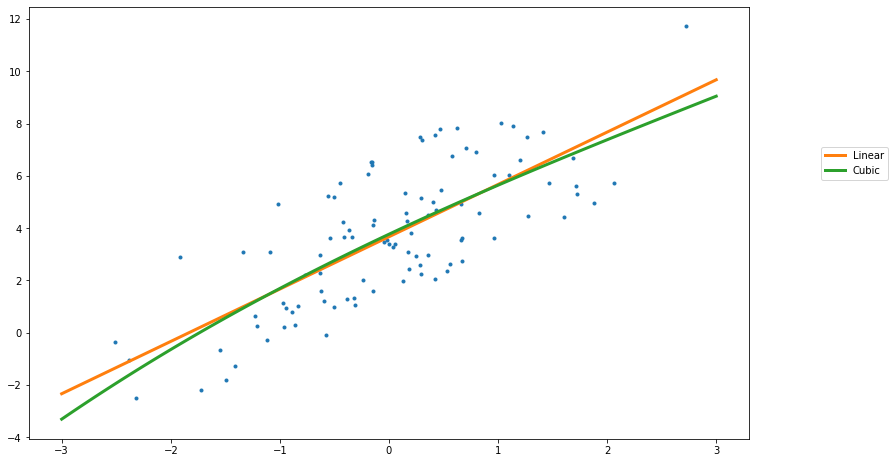

In [3]:
# Linear Vs Polynomial Visualization for Linear Relationship
x = np.random.randn(100)
delta = np.random.uniform(-3,3, size=(100,))
y = 2*x + 4 + delta

xp = np.linspace(-3, 3, 100)

z = np.polyfit(x, y, 1)
z3 = np.polyfit(x, y, 3)

p = np.poly1d(z)
p3 = np.poly1d(z3)

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.plot(x, y, '.')
ax.plot(xp, p(xp), label='Linear', lw=3)
ax.plot(xp, p3(xp), label='Cubic', lw=3)

ax.legend(loc=(1.1,0.6))
plt.show()

**(b) Answer (a) using test rather than training RSS.**

The more flexible approach leads one to believe that the test RSS will be greater than the linear approach, as it will have followed the train data too closely, a characteristic shared by more flexible methods.

We can run the plot above and generate new data and see the resulting linear fit vs cubic fit. The cubic fit results in some over-fitting of the train data, but in some cases, the over-fitting is not very dramatic.

**(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

The training RSS should still be lower for the cubic polynomial. How much lower will depend on the relationship and the training data. For example, the plot below shows a cubic fit greatly out-performing a linear model for a highly non-linear relationship. However, a slight non-linear relationship could be comparable to the linear model.

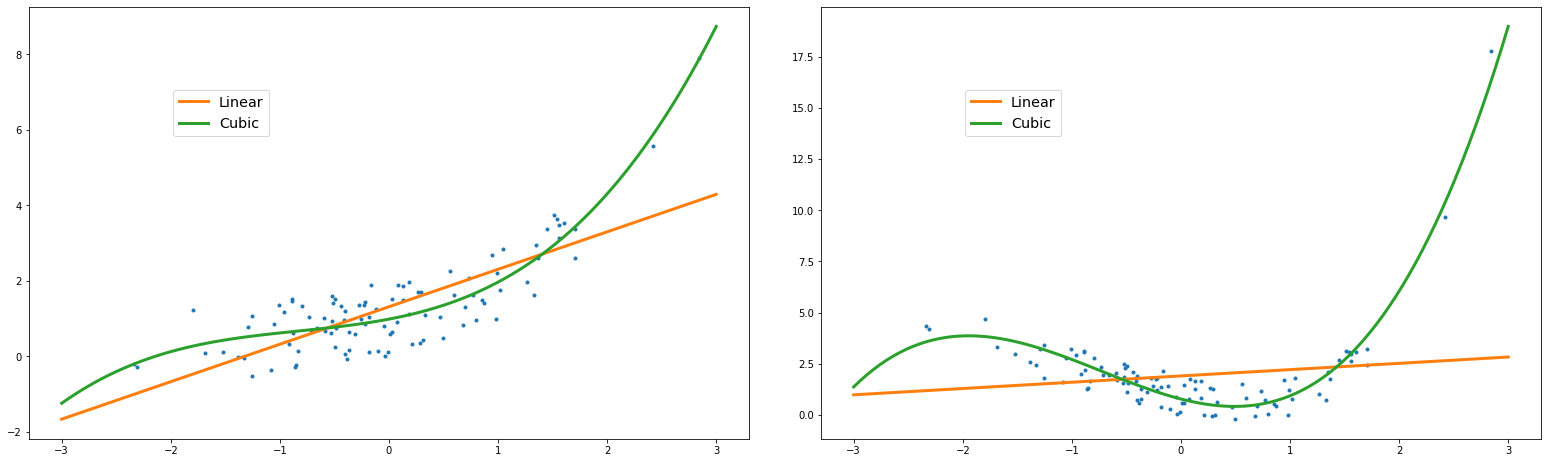

In [4]:
# Linear Vs Polynomial Visualization for Two Non-Linear Relationships
x = np.random.randn(100)

delta = np.random.uniform(-1,1, size=(100,))
y1 = 2**x + delta
y2 = 3**x - 2*x + delta

xp = np.linspace(-3, 3, 100)

z1 = np.polyfit(x, y1, 1)
z31 = np.polyfit(x, y1, 3)
z2 = np.polyfit(x, y2, 1)
z32 = np.polyfit(x, y2, 3)

p1 = np.poly1d(z1)
p31 = np.poly1d(z31)
p2 = np.poly1d(z2)
p32 = np.poly1d(z32)


fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([1.1,0,1,1])

ax1.plot(x, y1, '.')
ax1.plot(xp, p1(xp), label='Linear', lw=3)
ax1.plot(xp, p31(xp), label='Cubic', lw=3)

ax2.plot(x, y2, '.')
ax2.plot(xp, p2(xp), label='Linear', lw=3)
ax2.plot(xp, p32(xp), label='Cubic', lw=3)

ax1.legend(loc=(0.2,0.7), fontsize='x-large')
ax2.legend(loc=(0.2,0.7), fontsize='x-large')
plt.show()

**(d) Answer (c) using test rather than training RSS.**

There is not enough information to tell in this case. This all depends on the amount of non-linearity. For example, maybe it is linear for the most part, but curves slightly at one end of the data set. Then we would expect the linear model to perform very well except for maybe some bias towards the end. The cubic regression would still overfit on the bulk of the data, but capture this tiny curve at the end well, but overall would be worse. On the other hand, we could have a truly cubic relationship between $X$ and $Y$.

---

**5. Consider the fitted values that result from performing linear regression without an intercept. In this setting, the *i*th fitted value takes the form** $\hat{y}_i = x_i \hat{\beta}$

**where**

\begin{equation}\label{3.38}
    \hat{\beta} = \left( \sum_{i=1}^{n} x_i y_i \right) / \left( \sum_{i' = 1}^{n} x^2_{i'} \right)
\end{equation}

**Show  that we can write**
\begin{align*}
    \hat{y}_i = \sum^{n}_{i' = 1} a_{i'} y_{i'}
\end{align*}

**What is** $a_{i'}$?

*Note: We interpret this result by saying that the fitted values from
linear regression are **linear combinations** of the response values.*

\begin{align*}
\hat{y}_i &= x_i \hat{\beta} \\
&= x_i \left(\sum_{j=1}^n x_{j}y_j \right) / \left(\sum_{i'=1}^n x_{i'}^2 \right) \\
&= \sum_{j=1}^n \left( \frac{x_i x_j }{\sum_{i'=1}^n x_{i'}^2} \right)   y_j \\
&= \sum_{j=1}^n a_j y_j
\end{align*}

where $$a_j = \frac{x_i x_j }{\sum_{i'=1}^n x_{i'}^2}$$

---

**6. Using (3.4)**
\begin{align*}
    \hat{\beta}_1 = \frac{ \sum (x_i - \bar{x} (y_i - \bar{y} ) }{ \sum (x_i - \bar{x} )^2 }, \;
    \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
\end{align*}
**argue that in the case of simple linear regression, the least squares line always passes through the point** $(\bar{x}, \bar{y})$.

We will evaluate the model of simple linear regression for the point $\hat{y}(x_i = \bar{x})$ using the coefficient definitions above that are used to minimize the RSS.

\begin{align*}
    \hat{y}_i &= \hat{\beta}_0 + \hat{\beta}_1 x_i \\
    \hat{y}(\bar{x}) &= [\bar{y} - \hat{\beta}_1 \bar{x}] + \hat{\beta}_1 \bar{x} \\
    \hat{y}(\bar{x}) &= \bar{y}
\end{align*}

We have shown that $\hat{y}(\bar{x})$ will always result in $\bar{y}$ when using simple linear regression.